In [1]:
import numpy as np
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import depth_tools as tool
%matplotlib inline

mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

In [8]:
DATA = '../../data/real/'
OUTPUT = '../../output/'
RESULT = OUTPUT + 'output_wave1-double_from-real_aug-lumi2/predict_200_real_test_norm-local-pix=24_rate=50_crop=2_vloss_min/'
SAVE = OUTPUT + 'check_eval/'
size = 49

In [9]:
gt_img = cv2.imread(DATA + 'gt/00000.bmp', -1)
rec_img = cv2.imread(DATA + 'rec/00000.bmp', -1)
pred_img = cv2.imread(RESULT + 'predict-000.bmp', -1)

In [12]:
gt = tool.unpack_bmp_bgra_to_float(gt_img[:1200, :1200, :])
rec = tool.unpack_bmp_bgra_to_float(rec_img[:1200, :1200, :])
pred = tool.unpack_bmp_bgra_to_float(pred_img[:1200, :1200, :])

In [50]:
gap_err_abs = np.abs(gt - rec)
gap_err_sqr = np.square(gt - rec)
pred_err_abs = np.abs(gt - pred)
pred_err_sqr = np.square(gt - pred)

In [51]:
depth_threshold = 0.2
difference_threshold = 0.005
is_gt_available = gt > depth_threshold
is_depth_close = np.logical_and(
    gap_err_abs < difference_threshold,
    is_gt_available)
mask = is_depth_close * 1.0
mask_length = np.sum(mask)

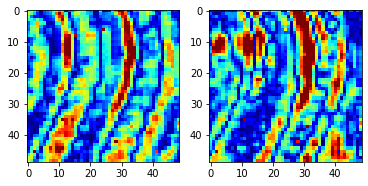

In [52]:
vmin_e, vmax_e = 0, 0.002

x = 700
y = 700
patch_gap_err_abs = gap_err_abs[y:y+size, x:x+size]
patch_pred_err_abs = pred_err_abs[y:y+size, x:x+size]

fig, ax = plt.subplots(1, 2)
ax[0].imshow(patch_gap_err_abs, cmap='jet', vmin=vmin_e, vmax=vmax_e)
ax[1].imshow(patch_pred_err_abs, cmap='jet', vmin=vmin_e, vmax=vmax_e)

In [53]:
patch_gap_err_sqr = gap_err_sqr[y:y+size, x:x+size]
patch_pred_err_sqr = pred_err_sqr[y:y+size, x:x+size]

In [54]:
diff_gap = rec - gt
diff_pred = pred - gt

patch_diff_gap = diff_gap[y:y+size, x:x+size]
patch_diff_pred = diff_pred[y:y+size, x:x+size]

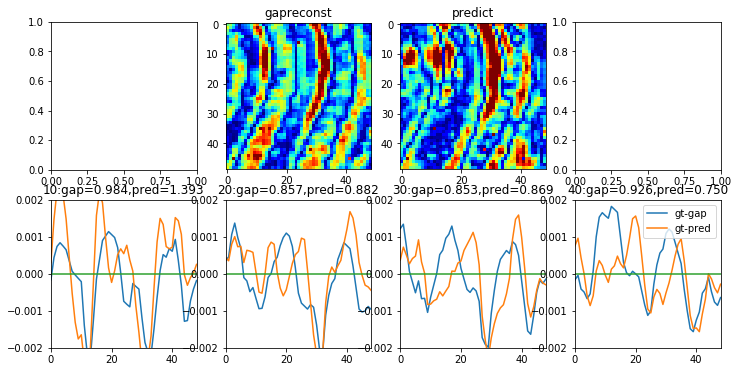

In [61]:
fig, ax = plt.subplots(2, 4, figsize=(12,6))

ax[0, 1].set_title('gapreconst')
ax[0, 1].imshow(patch_gap_err_abs, cmap='jet', vmin=vmin_e, vmax=vmax_e)
ax[0, 2].set_title('predict')
ax[0, 2].imshow(patch_pred_err_abs, cmap='jet', vmin=vmin_e, vmax=vmax_e)
ax[1, 0].set_ylim(-vmax_e, vmax_e)
ax[1, 1].set_ylim(-vmax_e, vmax_e)
ax[1, 2].set_ylim(-vmax_e, vmax_e)
ax[1, 3].set_ylim(-vmax_e, vmax_e)
#####################################################
idx = 10
slice_gap = patch_diff_gap[idx, :]
slice_pred = patch_diff_pred[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 0].plot(range(size), slice_gap, label='gt-gap')
ax[1, 0].plot(range(size), slice_pred, label='gt-pred')
ax[1, 0].plot(range(size), np.zeros(size))
ax[1, 0].set_title('{}:gap={:.03f},pred={:.03f}'.format(idx, rmse_gap, rmse_pred))
#####################################################
idx = 20
slice_gap = patch_diff_gap[idx, :]
slice_pred = patch_diff_pred[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 1].plot(range(size), slice_gap, label='gt-gap')
ax[1, 1].plot(range(size), slice_pred, label='gt-pred')
ax[1, 1].plot(range(size), np.zeros(size))
ax[1, 1].set_title('{}:gap={:.03f},pred={:.03f}'.format(idx, rmse_gap, rmse_pred))
#####################################################
idx = 30
slice_gap = patch_diff_gap[idx, :]
slice_pred = patch_diff_pred[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 2].plot(range(size), slice_gap, label='gt-gap')
ax[1, 2].plot(range(size), slice_pred, label='gt-pred')
ax[1, 2].plot(range(size), np.zeros(size))
ax[1, 2].set_title('{}:gap={:.03f},pred={:.03f}'.format(idx, rmse_gap, rmse_pred))
#####################################################
idx = 40
slice_gap = patch_diff_gap[idx, :]
slice_pred = patch_diff_pred[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 3].plot(range(size), slice_gap, label='gt-gap')
ax[1, 3].plot(range(size), slice_pred, label='gt-pred')
ax[1, 3].plot(range(size), np.zeros(size))
ax[1, 3].set_title('{}:gap={:.03f},pred={:.03f}'.format(idx, rmse_gap, rmse_pred))

############################
plt.legend()
plt.savefig(SAVE + 'slice_eval_diff.pdf')
plt.savefig(SAVE + 'slice_eval_diff.svg')
plt.show()

In [56]:
patch_gap = rec[y:y+size, x:x+size]
patch_pred = pred[y:y+size, x:x+size]
patch_gt = gt[y:y+size, x:x+size]

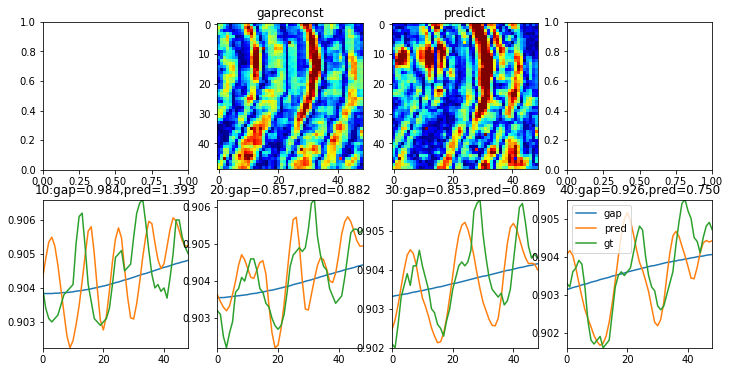

In [62]:
fig, ax = plt.subplots(2, 4, figsize=(12,6))

ax[0, 1].set_title('gapreconst')
ax[0, 1].imshow(patch_gap_err_abs, cmap='jet', vmin=vmin_e, vmax=vmax_e)
ax[0, 2].set_title('predict')
ax[0, 2].imshow(patch_pred_err_abs, cmap='jet', vmin=vmin_e, vmax=vmax_e)
#####################################################
idx = 10
slice_gap = patch_gap[idx, :]
slice_pred = patch_pred[idx, :]
slice_gt = patch_gt[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 0].plot(range(size), slice_gap, label='gap')
ax[1, 0].plot(range(size), slice_pred, label='pred')
ax[1, 0].plot(range(size), slice_gt, label='gt')
ax[1, 0].set_title('{}:gap={:.03f},pred={:.03f}'.format(idx, rmse_gap, rmse_pred))
#####################################################
idx = 20
slice_gap = patch_gap[idx, :]
slice_pred = patch_pred[idx, :]
slice_gt = patch_gt[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 1].plot(range(size), slice_gap, label='gap')
ax[1, 1].plot(range(size), slice_pred, label='pred')
ax[1, 1].plot(range(size), slice_gt, label='gt')
ax[1, 1].set_title('{}:gap={:.03f},pred={:.03f}'.format(idx, rmse_gap, rmse_pred))
#####################################################
idx = 30
slice_gap = patch_gap[idx, :]
slice_pred = patch_pred[idx, :]
slice_gt = patch_gt[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 2].plot(range(size), slice_gap, label='gap')
ax[1, 2].plot(range(size), slice_pred, label='pred')
ax[1, 2].plot(range(size), slice_gt, label='gt')
ax[1, 2].set_title('{}:gap={:.03f},pred={:.03f}'.format(idx, rmse_gap, rmse_pred))
#####################################################
idx = 40
slice_gap = patch_gap[idx, :]
slice_pred = patch_pred[idx, :]
slice_gt = patch_gt[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 3].plot(range(size), slice_gap, label='gap')
ax[1, 3].plot(range(size), slice_pred, label='pred')
ax[1, 3].plot(range(size), slice_gt, label='gt')
ax[1, 3].set_title('{}:gap={:.03f},pred={:.03f}'.format(idx, rmse_gap, rmse_pred))

############################
plt.legend()
plt.savefig(SAVE + 'slice_eval_abs.pdf')
plt.savefig(SAVE + 'slice_eval_abs.svg')
plt.show()

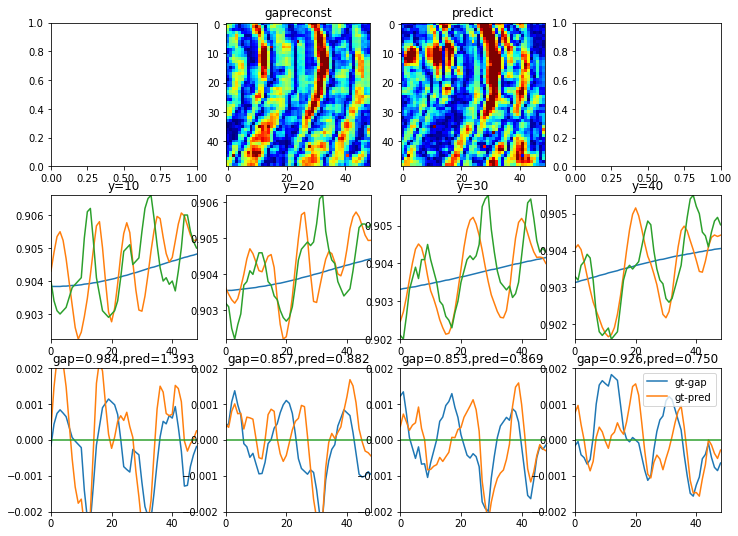

In [68]:
fig, ax = plt.subplots(3, 4, figsize=(12,9))

ax[0, 1].set_title('gapreconst')
ax[0, 1].imshow(patch_gap_err_abs, cmap='jet', vmin=vmin_e, vmax=vmax_e)
ax[0, 2].set_title('predict')
ax[0, 2].imshow(patch_pred_err_abs, cmap='jet', vmin=vmin_e, vmax=vmax_e)

ax[2, 0].set_ylim(-vmax_e, vmax_e)
ax[2, 1].set_ylim(-vmax_e, vmax_e)
ax[2, 2].set_ylim(-vmax_e, vmax_e)
ax[2, 3].set_ylim(-vmax_e, vmax_e)
#####################################################
idx = 10
slice_gap = patch_gap[idx, :]
slice_pred = patch_pred[idx, :]
slice_gt = patch_gt[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 0].plot(range(size), slice_gap, label='gap')
ax[1, 0].plot(range(size), slice_pred, label='pred')
ax[1, 0].plot(range(size), slice_gt, label='gt')
ax[1, 0].set_title('y={}'.format(idx))
###
slice_gap = patch_diff_gap[idx, :]
slice_pred = patch_diff_pred[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[2, 0].plot(range(size), slice_gap, label='gt-gap')
ax[2, 0].plot(range(size), slice_pred, label='gt-pred')
ax[2, 0].plot(range(size), np.zeros(size))
ax[2, 0].set_title('gap={:.03f},pred={:.03f}'.format(rmse_gap, rmse_pred))
#####################################################
idx = 20
slice_gap = patch_gap[idx, :]
slice_pred = patch_pred[idx, :]
slice_gt = patch_gt[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 1].plot(range(size), slice_gap, label='gap')
ax[1, 1].plot(range(size), slice_pred, label='pred')
ax[1, 1].plot(range(size), slice_gt, label='gt')
ax[1, 1].set_title('y={}'.format(idx))
###
slice_gap = patch_diff_gap[idx, :]
slice_pred = patch_diff_pred[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[2, 1].plot(range(size), slice_gap, label='gt-gap')
ax[2, 1].plot(range(size), slice_pred, label='gt-pred')
ax[2, 1].plot(range(size), np.zeros(size))
ax[2, 1].set_title('gap={:.03f},pred={:.03f}'.format(rmse_gap, rmse_pred))
#####################################################
idx = 30
slice_gap = patch_gap[idx, :]
slice_pred = patch_pred[idx, :]
slice_gt = patch_gt[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 2].plot(range(size), slice_gap, label='gap')
ax[1, 2].plot(range(size), slice_pred, label='pred')
ax[1, 2].plot(range(size), slice_gt, label='gt')
ax[1, 2].set_title('y={}'.format(idx))
###
slice_gap = patch_diff_gap[idx, :]
slice_pred = patch_diff_pred[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[2, 2].plot(range(size), slice_gap, label='gt-gap')
ax[2, 2].plot(range(size), slice_pred, label='gt-pred')
ax[2, 2].plot(range(size), np.zeros(size))
ax[2, 2].set_title('gap={:.03f},pred={:.03f}'.format(rmse_gap, rmse_pred))
#####################################################
idx = 40
slice_gap = patch_gap[idx, :]
slice_pred = patch_pred[idx, :]
slice_gt = patch_gt[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[1, 3].plot(range(size), slice_gap, label='gap')
ax[1, 3].plot(range(size), slice_pred, label='pred')
ax[1, 3].plot(range(size), slice_gt, label='gt')
ax[1, 3].set_title('y={}'.format(idx))
###
slice_gap = patch_diff_gap[idx, :]
slice_pred = patch_diff_pred[idx, :]
slice_gap_sqr = patch_gap_err_sqr[idx, :]
slice_pred_sqr = patch_pred_err_sqr[idx, :]
rmse_gap = np.sqrt(np.mean(slice_gap_sqr)) * 1000
rmse_pred = np.sqrt(np.mean(slice_pred_sqr)) * 1000

ax[2, 3].plot(range(size), slice_gap, label='gt-gap')
ax[2, 3].plot(range(size), slice_pred, label='gt-pred')
ax[2, 3].plot(range(size), np.zeros(size))
ax[2, 3].set_title('gap={:.03f},pred={:.03f}'.format(rmse_gap, rmse_pred))

############################
plt.legend()
plt.savefig(SAVE + 'slice_eval.pdf')
plt.savefig(SAVE + 'slice_eval.svg')
plt.show()